# Задание 2

### Линейная регрессия
Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует заданным точкам. Напомним, что общее уравнение для прямой есть **f(x) = m⋅x + b**, где **m** — наклон линии, а **b** — его сдвиг по y. Таким образом, решение линейной регрессии определяет значения для m и b, так что f (x) приближается как можно ближе к y.

Отобразим на графике случайные точки, расположенные в окрестности y = 3⋅x + 2

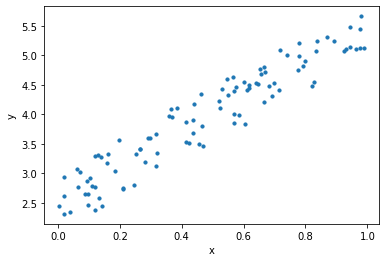

In [104]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Функция потерь
Функция потерь — это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением. Одна очень распространенная функция потерь называется средней квадратичной ошибкой (MSE). Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.

### Задание 2.1

Реализуйте свою реализацию линейной регрессии используя исключительно numpy и стандартный python на датасете, определённом выше

Estimated coefficients: a = [2.93655106], b = [2.55808002]
Root mean squared error:  0.07623324582875012
R2 score:  0.9038655568672764


Text(0, 0.5, 'y')

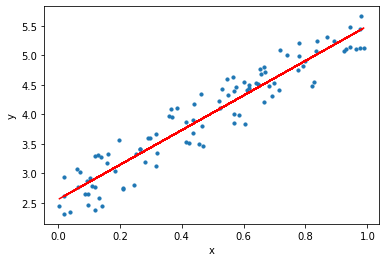

In [110]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# my_a, my_b = np.polyfit(x.flatten(),y.flatten(),1)

 

def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    x1, y1= x[i], y[i]
    covar += (x1 - mean_x) * (y1 - mean_y)
  return covar
 

def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 

def coefficients(x,y):
	x_mean, y_mean = np.mean(x), np.mean(y)
	a = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b = y_mean - a * x_mean
	return a, b
 


my_a, my_b = coefficients(x,y)

y_predicted = my_a*x+my_b
print(f'Estimated coefficients: a = {my_a}, b = {my_b}') # Print coefficients here

print('Root mean squared error: ', mean_squared_error(y, y_predicted))
print('R2 score: ', r2_score(y, y_predicted))

# Отобразим точки и регрессионную прямую
plt.scatter(x, y, s=10)
plt.plot(x, y_predicted, color='r')
plt.xlabel('x')
plt.ylabel('y')

### Задание 2.2

В предыдущем разделе мы использовали линейную регрессию с участием двух переменных. Почти все проблемы реального мира, с которыми вы столкнетесь, будут иметь более двух переменных. Линейная регрессия с участием нескольких переменных называется **«множественной линейной регрессией» (Multiple Linear Regression)**.

Уравнение множественной линейной регрессии имеет вид:

*y = b0 + b1 * x1 + b2 * x2 + ... + bn * xn*

Отличие между простой и множественной линейной регрессией заключается в том, что вместо линии регрессии в ней используется гиперплоскость.

В этом разделе мы будем использовать множественную линейную регрессию для прогнозирования потребления газа (в миллионах галлонов) в 48 штатах США на основе налогов на газ (в центах), дохода на душу населения (в долларах), шоссе с твердым покрытием (в милях) и доли население, имеющее водительские права.


#### Задание

1. Разделить датасет на тренировочную и тестовую части в соотношении 4 к 1
2. Реализовать множественную линейную классификацию с помощью sklearn
3. Обучить модель
4. Вывести сравнительную таблицу y_test и y_pred
5. Выведите парметры качества модели:
  - Mean Absolute Error
  - Mean Squared Error
  - Root Mean Squared Error

In [111]:
!wget http://edunet.kea.su/repo/src/L02_Linear_classifier/datasets/petrol_consumption.csv

--2021-10-20 12:06:15--  http://edunet.kea.su/repo/src/L02_Linear_classifier/datasets/petrol_consumption.csv
Resolving edunet.kea.su (edunet.kea.su)... 188.44.49.115
Connecting to edunet.kea.su (edunet.kea.su)|188.44.49.115|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://edunet.kea.su/repo/src/L02_Linear_classifier/datasets/petrol_consumption.csv [following]
--2021-10-20 12:06:16--  https://edunet.kea.su/repo/src/L02_Linear_classifier/datasets/petrol_consumption.csv
Connecting to edunet.kea.su (edunet.kea.su)|188.44.49.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1389 (1.4K) [text/csv]
Saving to: ‘petrol_consumption.csv.1’

petrol_consumption. 100%[===================>]   1.36K  --.-KB/s    in 0s      

2021-10-20 12:06:17 (150 MB/s) - ‘petrol_consumption.csv.1’ saved [1389/1389]



In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
dataset = pd.read_csv('/content/petrol_consumption.csv')
print(dataset.shape)
dataset.head()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [114]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [115]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

print(X.size)
print(X.shape)
print(y.size)
print(y.shape)

192
(48, 4)
48
(48,)


In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42) 


In [117]:
# Multiple regression here
from sklearn.linear_model import LinearRegression
my_LR = LinearRegression().fit(x_train, y_train)
print(my_LR.score(x_train, y_train))
print(f'coef = {my_LR.coef_}')

0.7068781342155135
coef = [-3.69937459e+01 -5.65355145e-02 -4.38217137e-03  1.34686930e+03]


In [118]:
y_pred = my_LR.predict(x_test)

In [119]:
# Print table here
print(x_test.shape)
# print(x_test)
print(y_test.shape)
# print(y_test)
print(y_pred.shape)
# print(y_pred)


# predicted_y = pd.DataFrame(y_pred, columns=['predicted Petrol_Consumption'])
# y_test_pd = pd.DataFrame(y_test)
predicted_data = x_test
predicted_data = pd.concat([x_test, y_test], axis=1)

predicted_data['predicted Petrol_Consumption'] = y_pred.tolist()

# x_test.head(10)
# y_test_pd.head(10)
predicted_data.head(10)






(10, 4)
(10,)
(10,)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption,predicted Petrol_Consumption
27,7.5,3846,9061,0.579,631,606.692665
40,7.0,4449,4639,0.626,587,673.779442
26,8.0,3448,5399,0.548,577,584.991490
43,7.0,3745,2611,0.508,591,563.536910
24,8.5,4574,2619,0.551,460,519.058672
37,7.0,3897,6385,0.586,704,643.461003
12,7.0,4817,6930,0.574,525,572.897614
19,8.5,4341,6010,0.677,640,687.077036
4,8.0,4399,431,0.544,410,547.609366
25,9.0,3721,4746,0.544,566,530.037630


In [120]:
# Metrics here
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R_f = r2_score(y_test, y_pred)
print(f'MAE = {MAE}')
print(f'MSE = {MSE}')
print(f'R = {R_f}')


MAE = 53.468541282916625
MSE = 4083.255871745378
R = 0.39136640014288837


Выводы: поскольку по метрикам видно, что сходится достаточно плохо - вероятно, зависимость сильно нелинейная